In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 data			 kaggle.json  'vijay no mask.jpeg'
 face-mask-dataset.zip	 sample_data  'vijay with mask.jpeg'


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_859.jpg', 'with_mask_90.jpg', 'with_mask_470.jpg', 'with_mask_214.jpg', 'with_mask_824.jpg']
['with_mask_1198.jpg', 'with_mask_1084.jpg', 'with_mask_628.jpg', 'with_mask_2836.jpg', 'with_mask_1261.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2444.jpg', 'without_mask_870.jpg', 'without_mask_3761.jpg', 'without_mask_1844.jpg', 'without_mask_139.jpg']
['without_mask_1368.jpg', 'without_mask_1834.jpg', 'without_mask_2998.jpg', 'without_mask_3150.jpg', 'without_mask_2255.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

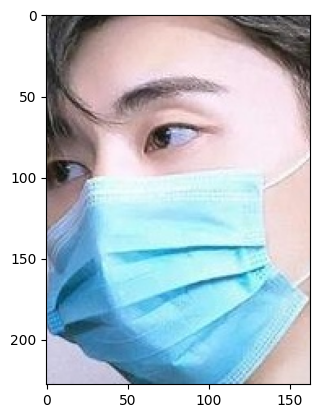

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

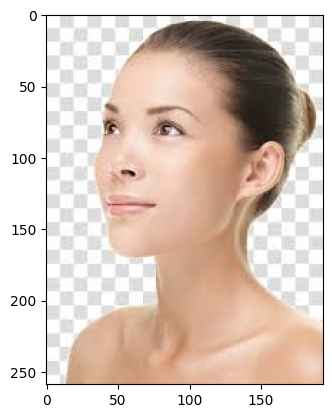

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[231, 204, 161],
        [233, 206, 163],
        [235, 208, 165],
        ...,
        [186, 230, 236],
        [184, 231, 238],
        [178, 231, 239]],

       [[228, 202, 160],
        [230, 204, 162],
        [232, 206, 165],
        ...,
        [186, 230, 236],
        [184, 230, 238],
        [180, 229, 239]],

       [[225, 200, 159],
        [227, 202, 161],
        [229, 204, 163],
        ...,
        [186, 230, 236],
        [185, 230, 238],
        [182, 230, 239]],

       ...,

       [[165, 139, 114],
        [167, 141, 116],
        [170, 144, 119],
        ...,
        [177, 234, 241],
        [176, 233, 240],
        [175, 232, 239]],

       [[163, 137, 112],
        [164, 138, 113],
        [165, 139, 114],
        ...,
        [176, 233, 240],
        [176, 233, 240],
        [175, 232, 239]],

       [[159, 133, 108],
        [158, 132, 107],
        [158, 132, 107],
        ...,
        [175, 232, 239],
        [175, 232, 239],
        [175, 232, 239]]], dtype=uint8)
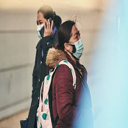

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 28,  27,  23],
        [ 28,  27,  23],
        [ 28,  27,  23],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 30,  29,  25],
        [ 30,  29,  25],
        [ 30,  29,  25],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 29,  28,  24],
        [ 29,  28,  24],
        [ 29,  28,  24],
        ...,
        [ 44,  44,  36],
        [ 44,  44,  36],
        [ 44,  44,  36]],

       ...,

       [[ 73,  41,  14],
        [ 70,  40,  15],
        [ 61,  35,  16],
        ...,
        [194, 189, 185],
        [193, 188, 184],
        [192, 187, 183]],

       [[ 79,  51,  27],
        [ 72,  44,  21],
        [ 61,  35,  17],
        ...,
        [193, 189, 185],
        [192, 188, 184],
        [192, 187, 183]],

       [[107,  91,  80],
        [ 87,  65,  51],
        [ 63,  39,  24],
        ...,
        [191, 188, 183],
        [190, 187, 182],
        [190, 187, 182]]], dtype=uint8)
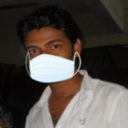

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        ...,
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647]],

       ...,

       [[0.28627451, 0.16078431, 0.05490196],
        [0.2745098 , 0.15686275, 0.05882353],
        [0.23921569, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 9s 24ms/step - loss: 0.4003 - acc: 0.8282 - val_loss: 0.2428 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2687 - acc: 0.8933 - val_loss: 0.2135 - val_acc: 0.9157
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2047 - acc: 0.9139 - val_loss: 0.2016 - val_acc: 0.9256
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1887 - acc: 0.9255 - val_loss: 0.2086 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1487 - acc: 0.9399 - val_loss: 0.2040 - val_acc: 0.9174


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2277 - acc: 0.9292
Test Accuracy = 0.9291859865188599


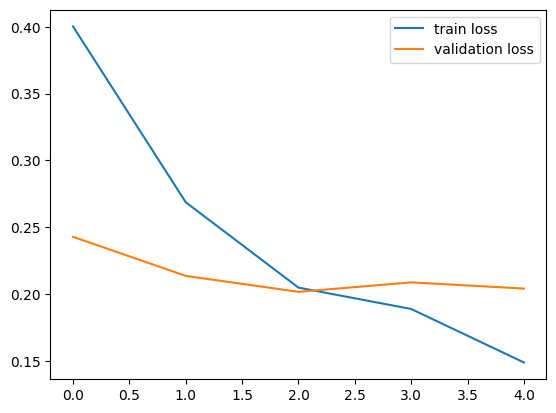

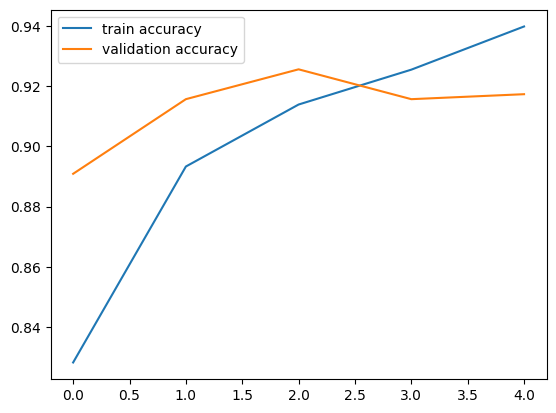

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/vijay with mask.jpeg


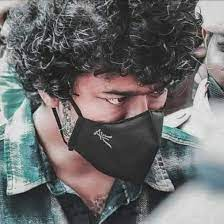

1/1 [==============================] - 0s 20ms/step
[[0.02293264 0.9479405 ]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/vijay no mask.jpeg


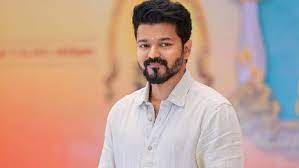

1/1 [==============================] - 0s 29ms/step
[[0.51083356 0.5862688 ]]
1
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')